# Key Levels Detection (Close)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
from sklearn.cluster import KMeans

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-09-18 14:15:00,1310.7,1313.5,1308.7,1312.8,8783
2024-09-18 14:20:00,1312.8,1313.2,1310.8,1311.3,6209
2024-09-18 14:25:00,1311.1,1313.3,1311.1,1311.2,5452


In [3]:
data = dataset.copy()
back_bar = 10
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(next_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()
data

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next
Date,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,NaN,NaN,NaN,NaN
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,NaN,NaN,NaN,NaN
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,NaN,NaN,NaN,NaN
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,NaN,NaN,NaN,NaN
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-09-18 14:15:00,1310.7,1313.5,1308.7,1312.8,8783,1314.4,NaN,1308.7,NaN
2024-09-18 14:20:00,1312.8,1313.2,1310.8,1311.3,6209,1314.4,NaN,1308.7,NaN
2024-09-18 14:25:00,1311.1,1313.3,1311.1,1311.2,5452,1314.4,NaN,1308.7,NaN


In [4]:
data['is_r_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_prev'] and r['High'] == r['max_next']) else False, axis=1)
data['is_s_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_prev'] and r['Low'] == r['min_next']) else False, axis=1)
data

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next,is_r_keylevel,is_s_keylevel
Date,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,NaN,NaN,NaN,NaN,False,False
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18 14:15:00,1310.7,1313.5,1308.7,1312.8,8783,1314.4,NaN,1308.7,NaN,False,False
2024-09-18 14:20:00,1312.8,1313.2,1310.8,1311.3,6209,1314.4,NaN,1308.7,NaN,False,False
2024-09-18 14:25:00,1311.1,1313.3,1311.1,1311.2,5452,1314.4,NaN,1308.7,NaN,False,False


## Clustering

In [5]:
def prepare_clustering_data(htd):
    htd['high_diff_1'] = htd['High'] - htd['High'].shift(1)
    htd['high_diff_2'] = htd['High'] - htd['High'].shift(2)
    htd['low_diff_1'] = htd['Low'] - htd['Low'].shift(1)
    htd['low_diff_2'] = htd['Low'] - htd['Low'].shift(2)
    htd['open_diff_1'] = htd['Open'] - htd['Open'].shift(1)
    htd['open_diff_2'] = htd['Open'] - htd['Open'].shift(2)
    htd['close_diff_1'] = htd['Close'] - htd['Close'].shift(1)
    htd['close_diff_2'] = htd['Close'] - htd['Close'].shift(2)
    htd.dropna(inplace=True)
    return htd

In [6]:
data = prepare_clustering_data(data)

In [7]:
cluster_data = data.copy()

In [8]:
cluster1_cols = ["high_diff_1", "high_diff_2", "low_diff_1", "low_diff_2",
                         "open_diff_1", "open_diff_2", "close_diff_1", "close_diff_2"]
cluster1 = KMeans(n_clusters=97, n_init=2).fit(cluster_data[cluster1_cols])
data = data.assign(cluster1=cluster1.labels_)

In [9]:
data

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next,is_r_keylevel,is_s_keylevel,high_diff_1,high_diff_2,low_diff_1,low_diff_2,open_diff_1,open_diff_2,close_diff_1,close_diff_2,cluster1
Date,,,,,,,,,,,,,,,,,,,,
2018-08-13 09:45:00,944.5,945.2,944.4,945.0,1168,945.9,946.4,942.3,943.5,False,False,0.4,0.7,1.1,0.7,0.7,0.5,0.5,1.3,11
2018-08-13 09:50:00,945.0,946.0,944.3,946.0,1213,946.0,946.4,942.3,943.5,False,False,0.8,1.2,-0.1,1.0,0.5,1.2,1.0,1.5,33
2018-08-13 09:55:00,946.2,946.4,945.6,946.0,1873,946.4,946.4,942.3,943.5,True,False,0.4,1.2,1.3,1.2,1.2,1.7,0.0,1.0,86
2018-08-13 10:00:00,945.9,946.3,945.5,945.5,1704,946.4,946.3,942.4,942.9,False,False,-0.1,0.3,-0.1,1.2,-0.3,0.9,-0.5,-0.5,46
2018-08-13 10:05:00,945.5,946.0,945.0,945.0,1436,946.4,946.0,943.3,942.3,False,False,-0.3,-0.4,-0.5,-0.6,-0.4,-0.7,-0.5,-1.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-18 13:30:00,1313.1,1314.2,1313.0,1313.5,4170,1318.5,1314.4,1312.2,1308.7,False,False,0.7,-0.3,0.8,0.4,-0.2,-1.3,0.5,0.1,37
2024-09-18 13:35:00,1313.5,1313.5,1310.7,1311.5,8279,1318.5,1314.4,1310.7,1308.7,False,False,-0.7,0.0,-2.3,-1.5,0.4,0.2,-2.0,-1.5,89
2024-09-18 13:40:00,1311.6,1313.0,1310.9,1312.5,4512,1318.5,1314.4,1310.7,1308.7,False,False,-0.5,-1.2,0.2,-2.1,-1.9,-1.5,1.0,-1.0,53


In [11]:
supply_data = data[data['is_r_keylevel'] == True]
demand_data = data[data['is_s_keylevel'] == True]
normal_data = data[(data['is_r_keylevel'] != True) | (data['is_s_keylevel'] != True)]

<Axes: ylabel='Frequency'>

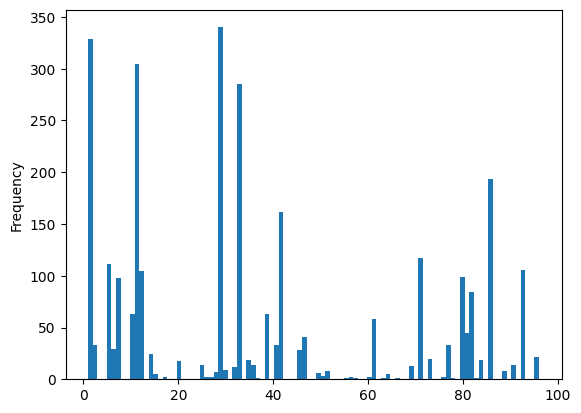

In [17]:
supply_data['cluster1'].plot.hist(bins=97)

<Axes: ylabel='Frequency'>

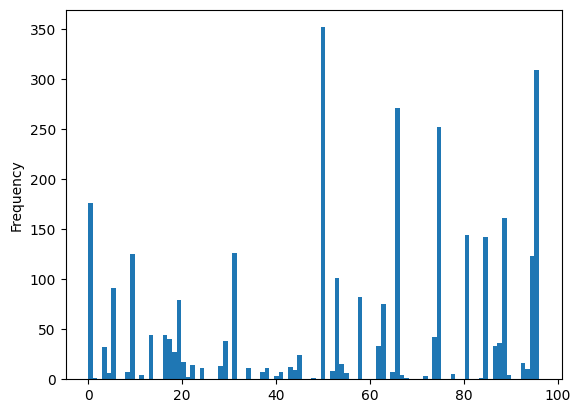

In [18]:
demand_data['cluster1'].plot.hist(bins=97)

<Axes: ylabel='Frequency'>

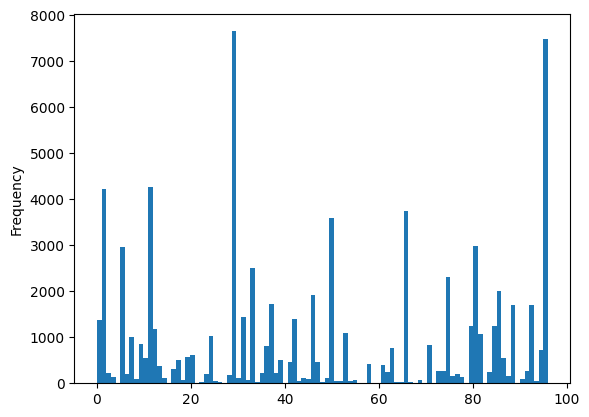

In [19]:
normal_data['cluster1'].plot.hist(bins=97)